In [14]:
import os
import torch
import pandas as pd
import numpy as np
import model_AD_1 as AD
import pickle

%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import torch 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
x_pos = np.load('./../generated_data_v1/us_import1/stage_2/train_x_pos.npy')
x_neg = np.load('./../generated_data_v1/us_import1/stage_2/train_x_neg.npy')

In [4]:
x_neg = x_neg.reshape([x_pos.shape[0], -1 , x_pos.shape[1]])

In [5]:
with open('./../generated_data_v1/us_import1/domain_dims.pkl','rb')  as fh:
    domain_dims= pickle.load(fh)
    

In [6]:
total_entity_count = sum(domain_dims.values())

In [9]:
model = AD.AD_model_container(total_entity_count, emb_dim=16, device=device)

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch 0  batch 0 Loss 47.876045
Epoch 0  batch 100 Loss 46.297306
Epoch 0  batch 200 Loss 44.809227
Epoch 0  batch 300 Loss 43.757381
Epoch 0  batch 400 Loss 42.301041


  4%|▍         | 1/25 [00:04<01:45,  4.41s/it]

Epoch 0  batch 500 Loss 40.619095
Epoch 1  batch 0 Loss 40.321259
Epoch 1  batch 100 Loss 39.030857
Epoch 1  batch 200 Loss 37.693970
Epoch 1  batch 300 Loss 36.084736
Epoch 1  batch 400 Loss 34.717056


  8%|▊         | 2/25 [00:08<01:41,  4.40s/it]

Epoch 1  batch 500 Loss 33.722275
Epoch 2  batch 0 Loss 33.078110
Epoch 2  batch 100 Loss 31.384113
Epoch 2  batch 200 Loss 30.421284
Epoch 2  batch 300 Loss 28.618450
Epoch 2  batch 400 Loss 27.911922


 12%|█▏        | 3/25 [00:13<01:37,  4.43s/it]

Epoch 2  batch 500 Loss 25.978275
Epoch 3  batch 0 Loss 25.101763
Epoch 3  batch 100 Loss 25.148193
Epoch 3  batch 200 Loss 23.873272
Epoch 3  batch 300 Loss 21.768644
Epoch 3  batch 400 Loss 21.124874


 16%|█▌        | 4/25 [00:17<01:32,  4.41s/it]

Epoch 3  batch 500 Loss 19.724022
Epoch 4  batch 0 Loss 19.263872
Epoch 4  batch 100 Loss 18.599833
Epoch 4  batch 200 Loss 18.078346
Epoch 4  batch 300 Loss 16.827991
Epoch 4  batch 400 Loss 16.422577


 20%|██        | 5/25 [00:22<01:27,  4.39s/it]

Epoch 4  batch 500 Loss 15.283034
Epoch 5  batch 0 Loss 14.555704
Epoch 5  batch 100 Loss 14.466606
Epoch 5  batch 200 Loss 13.963898
Epoch 5  batch 300 Loss 13.275808
Epoch 5  batch 400 Loss 13.293684


 24%|██▍       | 6/25 [00:26<01:23,  4.39s/it]

Epoch 5  batch 500 Loss 11.786094
Epoch 6  batch 0 Loss 11.431938
Epoch 6  batch 100 Loss 11.136173
Epoch 6  batch 200 Loss 10.006443
Epoch 6  batch 300 Loss 11.009378
Epoch 6  batch 400 Loss 8.852017


 28%|██▊       | 7/25 [00:30<01:18,  4.38s/it]

Epoch 6  batch 500 Loss 8.974162
Epoch 7  batch 0 Loss 9.113407
Epoch 7  batch 100 Loss 8.366033
Epoch 7  batch 200 Loss 7.566897
Epoch 7  batch 300 Loss 7.717204
Epoch 7  batch 400 Loss 7.377074


 32%|███▏      | 8/25 [00:35<01:14,  4.38s/it]

Epoch 7  batch 500 Loss 7.698540
Epoch 8  batch 0 Loss 7.258582
Epoch 8  batch 100 Loss 6.911578
Epoch 8  batch 200 Loss 5.959703
Epoch 8  batch 300 Loss 6.338947
Epoch 8  batch 400 Loss 5.558129


 36%|███▌      | 9/25 [00:39<01:10,  4.38s/it]

Epoch 8  batch 500 Loss 5.636425
Epoch 9  batch 0 Loss 5.926168
Epoch 9  batch 100 Loss 5.019272
Epoch 9  batch 200 Loss 4.909796
Epoch 9  batch 300 Loss 4.924797
Epoch 9  batch 400 Loss 4.208258


 40%|████      | 10/25 [00:43<01:05,  4.38s/it]

Epoch 9  batch 500 Loss 4.510616
Epoch 10  batch 0 Loss 4.068588
Epoch 10  batch 100 Loss 4.376233
Epoch 10  batch 200 Loss 4.120131
Epoch 10  batch 300 Loss 4.244473
Epoch 10  batch 400 Loss 3.913886


 44%|████▍     | 11/25 [00:48<01:01,  4.39s/it]

Epoch 10  batch 500 Loss 3.669639
Epoch 11  batch 0 Loss 3.471772
Epoch 11  batch 100 Loss 3.644150
Epoch 11  batch 200 Loss 3.425099
Epoch 11  batch 300 Loss 3.365741
Epoch 11  batch 400 Loss 2.868583


 48%|████▊     | 12/25 [00:52<00:57,  4.39s/it]

Epoch 11  batch 500 Loss 2.912651
Epoch 12  batch 0 Loss 3.248083
Epoch 12  batch 100 Loss 2.586484
Epoch 12  batch 200 Loss 3.028245
Epoch 12  batch 300 Loss 2.819515
Epoch 12  batch 400 Loss 2.677786


 52%|█████▏    | 13/25 [00:57<00:52,  4.40s/it]

Epoch 12  batch 500 Loss 2.593118
Epoch 13  batch 0 Loss 2.658335
Epoch 13  batch 100 Loss 2.224199
Epoch 13  batch 200 Loss 2.425684
Epoch 13  batch 300 Loss 2.289432
Epoch 13  batch 400 Loss 2.422141


 56%|█████▌    | 14/25 [01:01<00:48,  4.40s/it]

Epoch 13  batch 500 Loss 2.959134
Epoch 14  batch 0 Loss 1.911575
Epoch 14  batch 100 Loss 2.241442
Epoch 14  batch 200 Loss 1.961353
Epoch 14  batch 300 Loss 1.742124
Epoch 14  batch 400 Loss 2.303896


 60%|██████    | 15/25 [01:05<00:44,  4.42s/it]

Epoch 14  batch 500 Loss 1.988858
Epoch 15  batch 0 Loss 1.711657
Epoch 15  batch 100 Loss 2.109929
Epoch 15  batch 200 Loss 1.937734
Epoch 15  batch 300 Loss 2.044746
Epoch 15  batch 400 Loss 1.917965


 64%|██████▍   | 16/25 [01:10<00:39,  4.41s/it]

Epoch 15  batch 500 Loss 1.581614
Epoch 16  batch 0 Loss 1.777126
Epoch 16  batch 100 Loss 1.534860
Epoch 16  batch 200 Loss 1.518952
Epoch 16  batch 300 Loss 1.777728
Epoch 16  batch 400 Loss 1.510426


 68%|██████▊   | 17/25 [01:14<00:35,  4.41s/it]

Epoch 16  batch 500 Loss 1.777885
Epoch 17  batch 0 Loss 1.446432
Epoch 17  batch 100 Loss 1.558882
Epoch 17  batch 200 Loss 1.427826
Epoch 17  batch 300 Loss 1.414801
Epoch 17  batch 400 Loss 1.535624


 72%|███████▏  | 18/25 [01:19<00:30,  4.41s/it]

Epoch 17  batch 500 Loss 1.595964
Epoch 18  batch 0 Loss 1.196483
Epoch 18  batch 100 Loss 1.475512
Epoch 18  batch 200 Loss 1.422692
Epoch 18  batch 300 Loss 1.331934
Epoch 18  batch 400 Loss 1.576143


 76%|███████▌  | 19/25 [01:23<00:26,  4.40s/it]

Epoch 18  batch 500 Loss 1.343199
Epoch 19  batch 0 Loss 1.442660
Epoch 19  batch 100 Loss 1.246768
Epoch 19  batch 200 Loss 1.278911
Epoch 19  batch 300 Loss 1.363920
Epoch 19  batch 400 Loss 1.286934


 80%|████████  | 20/25 [01:27<00:21,  4.40s/it]

Epoch 19  batch 500 Loss 1.285917
Epoch 20  batch 0 Loss 1.182869
Epoch 20  batch 100 Loss 1.337166
Epoch 20  batch 200 Loss 1.121328
Epoch 20  batch 300 Loss 1.382246
Epoch 20  batch 400 Loss 1.169829


 84%|████████▍ | 21/25 [01:32<00:17,  4.39s/it]

Epoch 20  batch 500 Loss 1.113256
Epoch 21  batch 0 Loss 1.206871
Epoch 21  batch 100 Loss 1.095086
Epoch 21  batch 200 Loss 1.168304
Epoch 21  batch 300 Loss 1.162098
Epoch 21  batch 400 Loss 1.155327


 88%|████████▊ | 22/25 [01:36<00:13,  4.40s/it]

Epoch 21  batch 500 Loss 1.036066
Epoch 22  batch 0 Loss 0.977636
Epoch 22  batch 100 Loss 1.065119
Epoch 22  batch 200 Loss 1.022006
Epoch 22  batch 300 Loss 1.207821
Epoch 22  batch 400 Loss 1.244359


 92%|█████████▏| 23/25 [01:41<00:08,  4.40s/it]

Epoch 22  batch 500 Loss 0.951764
Epoch 23  batch 0 Loss 1.140992
Epoch 23  batch 100 Loss 1.215940
Epoch 23  batch 200 Loss 1.235320
Epoch 23  batch 300 Loss 1.137604
Epoch 23  batch 400 Loss 0.996488


 96%|█████████▌| 24/25 [01:45<00:04,  4.40s/it]

Epoch 23  batch 500 Loss 1.014160
Epoch 24  batch 0 Loss 1.038651
Epoch 24  batch 100 Loss 0.979999
Epoch 24  batch 200 Loss 1.131921
Epoch 24  batch 300 Loss 1.186720
Epoch 24  batch 400 Loss 0.960696


100%|██████████| 25/25 [01:49<00:00,  4.40s/it]

Epoch 24  batch 500 Loss 1.029344


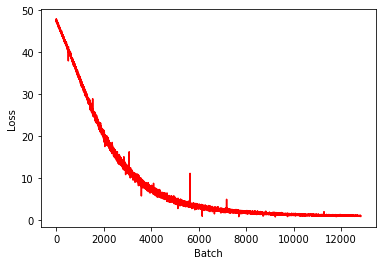

In [10]:
model.train_model(x_pos,x_neg, batch_size=256, epochs=25)

In [12]:
model.model.mode='test'

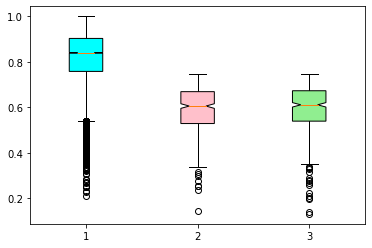

In [20]:
test_df = pd.read_csv( './../generated_data_v1/us_import1/stage_2/test_normal_data.csv', index_col=None )
ID_COL = 'PanjivaRecordID'
id_list = test_df[ID_COL].values.tolist()
del test_df[ID_COL]
test_x = test_df.values
scores_1 = model.score_samples(test_x)


test_df_p = pd.read_csv( './../generated_data_v1/us_import1/stage_2/test_pos_data.csv', index_col=None )
id_list = test_df_p[ID_COL].values.tolist()
del test_df_p[ID_COL]
test_xp = test_df_p.values
scores_2 = np.array(model.score_samples(test_xp))-0.25

test_df_n = pd.read_csv( './../generated_data_v1/us_import1/stage_2/test_neg_data.csv', index_col=None )
id_list = test_df_n[ID_COL].values.tolist()
del test_df_n[ID_COL]
test_xn = test_df_n.values
scores_3 = np.array(model.score_samples(test_xn))-0.25 


data = [np.random.normal(0, std, 1000) for std in range(1, 6)]
box = plt.boxplot([scores_1,scores_2,scores_3], notch=True, patch_artist=True)
colors = ['cyan', 'pink', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()